### Problem Statement : 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Our classification goal is to predict if the client will subscribe a term deposit (variable y).

### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
df = pd.read_csv('bank_new_full.csv',sep=';')

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Segregating Categorical and Numerical Columns

In [7]:
cat_cols = []
num_cols = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat_cols.append(i)
    else:
        num_cols.append(i)    

In [8]:
for i in cat_cols:
    print(i,"-->",df[i].value_counts().count())

job --> 12
marital --> 4
education --> 8
default --> 3
housing --> 3
loan --> 3
contact --> 2
month --> 10
day_of_week --> 5
poutcome --> 3
y --> 2


### Visualisation

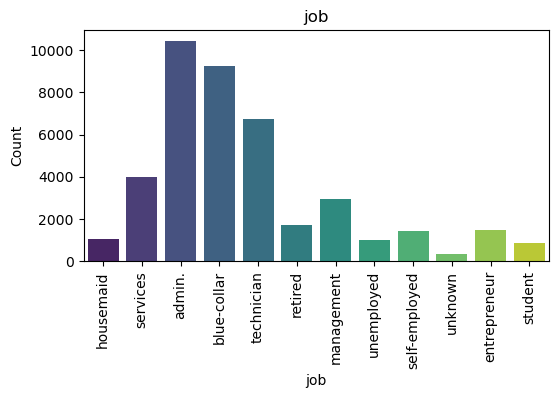

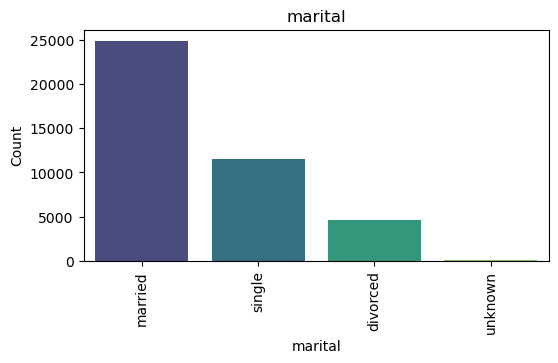

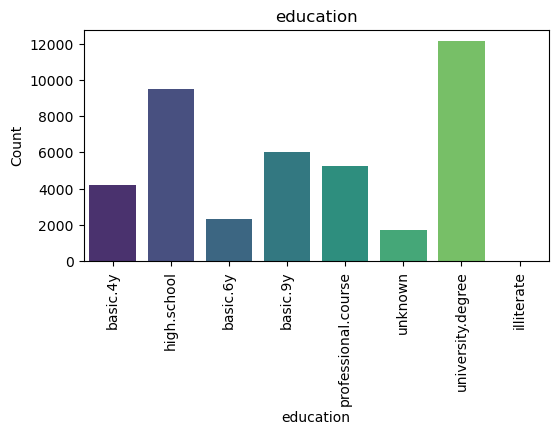

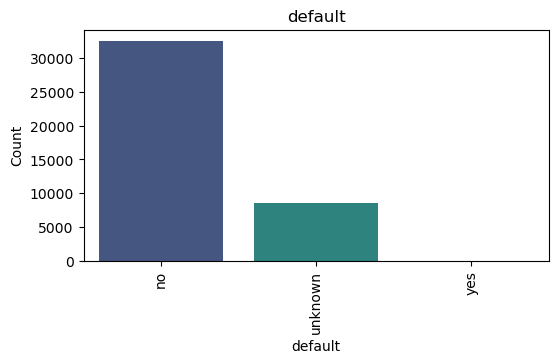

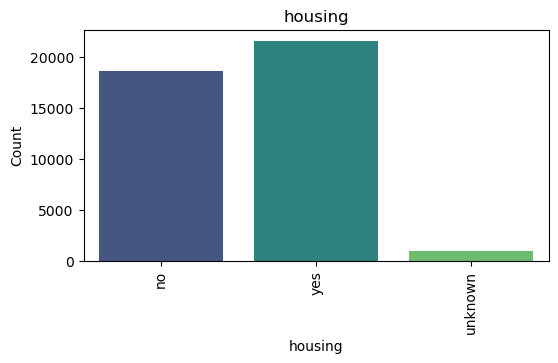

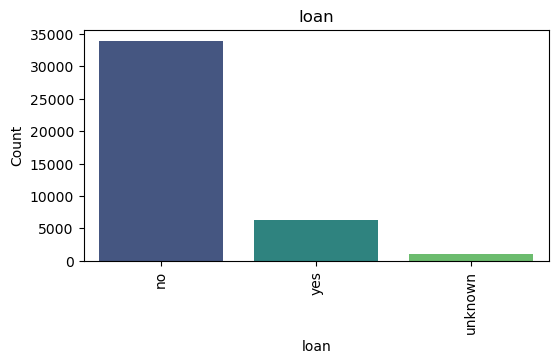

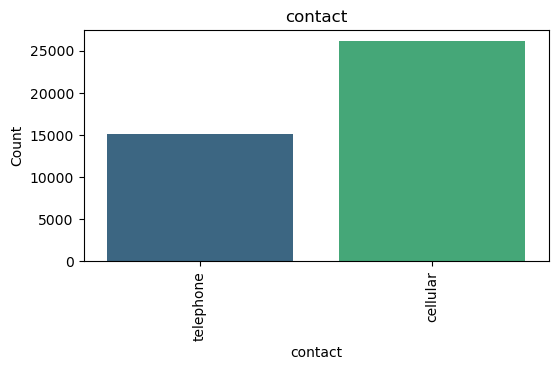

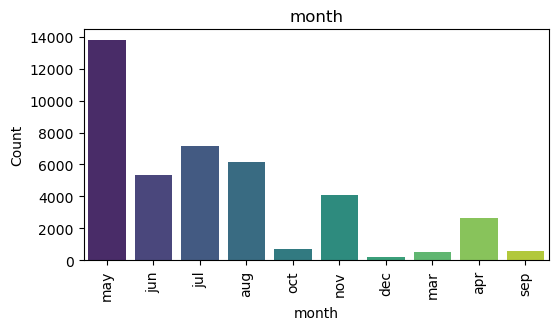

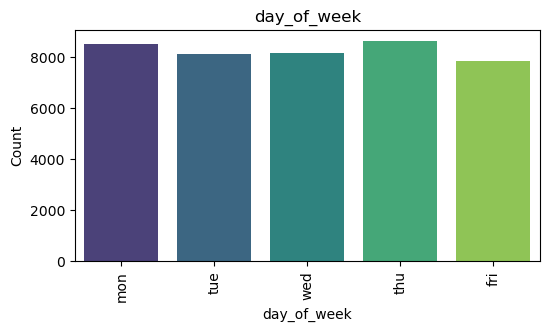

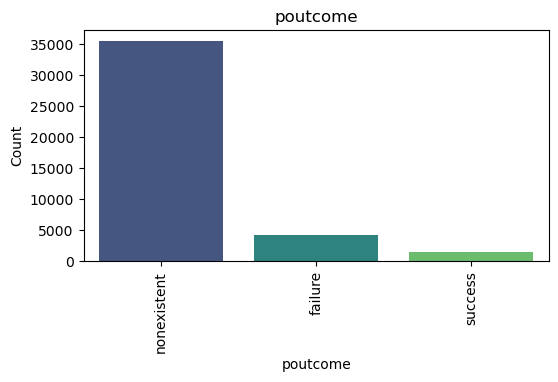

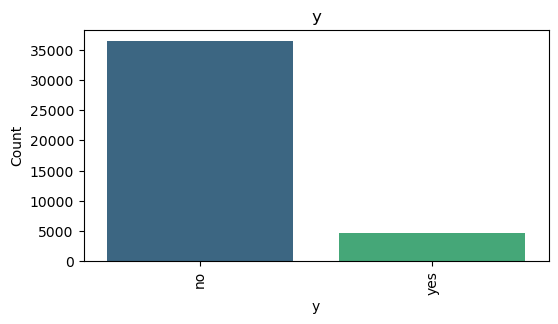

In [9]:
for i in cat_cols:
    plt.figure(figsize=(6,3))
    # sns.countplot(x=i,data=df,palette='viridis') # Commenting Just for removing warning
    sns.countplot(x=i,data=df,palette='viridis',hue = i,legend=False)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()
    

In [10]:
tar_val_cnt = df['y'].value_counts()

In [11]:
print(f"Yes Percentage: {round(tar_val_cnt['yes']/df.shape[0]*100,2)}%")
print(f"No Percentage: {round(tar_val_cnt['no']/df.shape[0]*100,2)}%")

Yes Percentage: 11.27%
No Percentage: 88.73%


## Observation :
#### By analyzing data I found target column is highly **Imbalance i.e `Yes --> 11.27%` and `No --> 88.73%`**.

### Solution : 
1. Oversampling.
2. Undersampling

### Doing Label Encoding of Categorical Data

In [12]:
label_dict = {}
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in cat_cols:
    if i != 'y':
        df[i] = label.fit_transform(df[i])
        label_dict[i] = dict(zip(label.classes_,label.transform(label.classes_)))
    else :
        df[i] = df[i].map({'yes' : 1,'no' : 0})    

<Axes: >

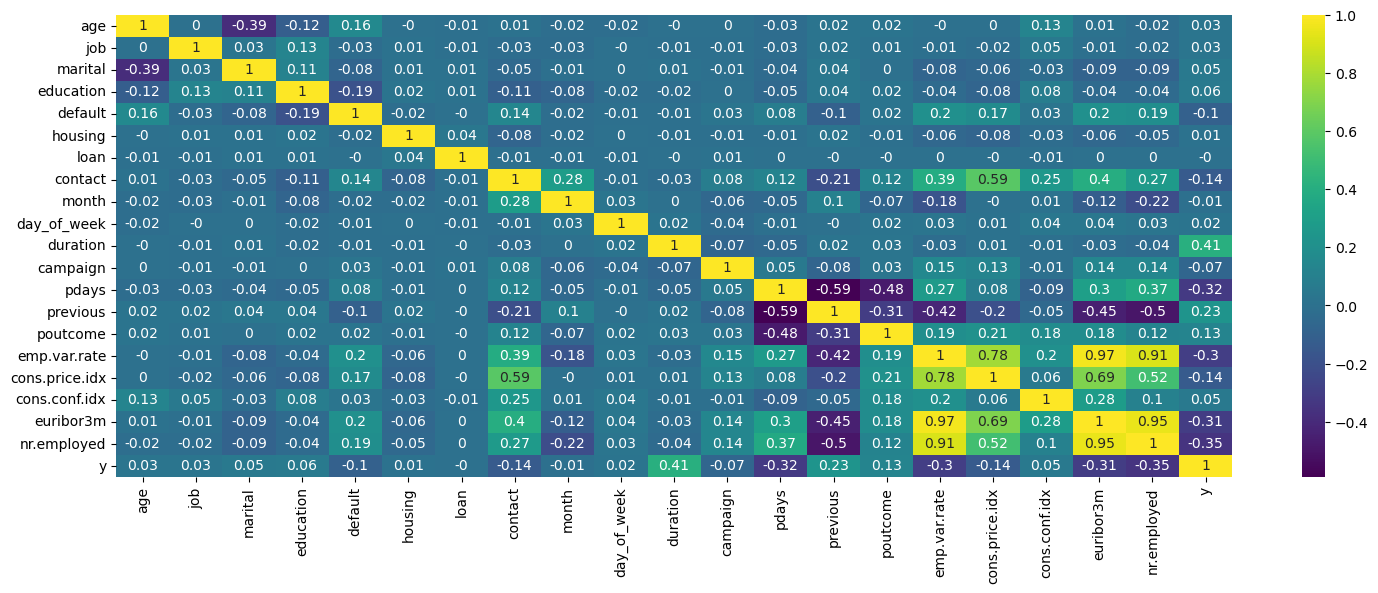

In [13]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr().round(2),annot=True,cmap='viridis')

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**CONSUMER CONFIDENCE INDEX (CCI)** : It measure the degree of consumer optimism related to state of economy. It attempts to measure how consumers are feeling regarding their economy their investments, if consumer optimism is high, then obviously there are willing to invest more.

### Observation : 
By seeing high correlation heatmap,we need to drop some of the features.
Droping following features : 
- emp.var.rate
- cons.price.idx
- euribor3m
- pdays
- cons.conf.idx 

I have decided to drop it because I want to build a predictor which predicts whether a consumer will subscribe or not based on certain inputs, but I can't take CCI as input since it comes from survey.

In [15]:
df= df.drop(['emp.var.rate','cons.price.idx','euribor3m','pdays','nr.employed','cons.conf.idx'],axis=1)

<Axes: >

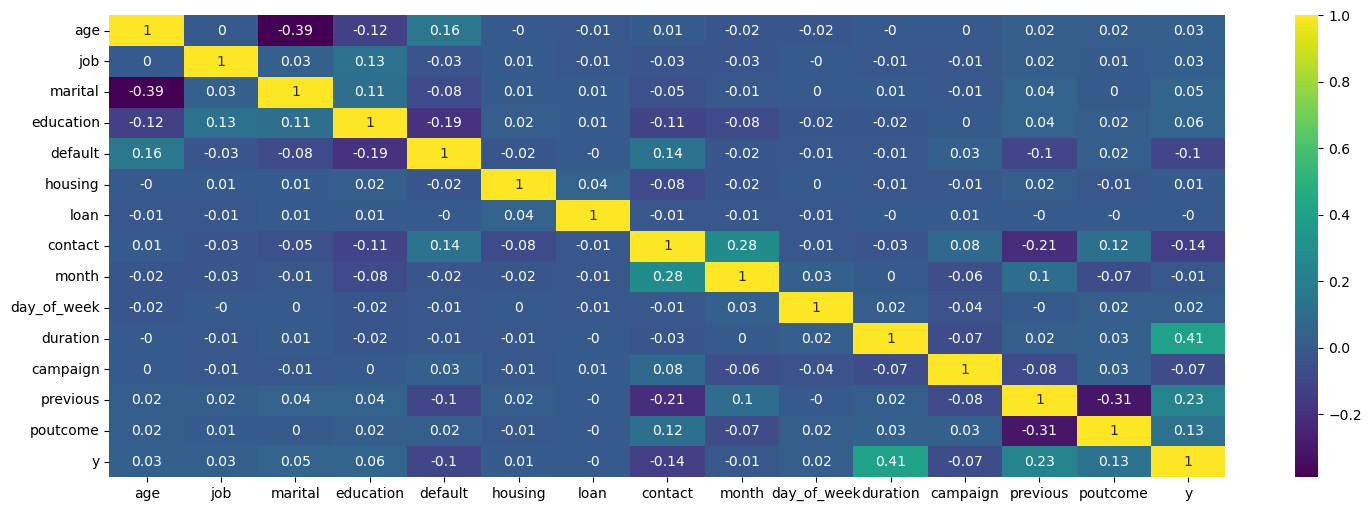

In [16]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr().round(2),annot=True,cmap='viridis')

In [17]:
for i in cat_cols:
    # if i != 'y':
    df[i] = df[i].astype('category')

In [18]:
df.dtypes

age               int64
job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
duration          int64
campaign          int64
previous          int64
poutcome       category
y              category
dtype: object

In [19]:
inputs = df.drop('y',axis=1)
target = df['y']

### Segregating _20%_ of data for testing.

In [20]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=42)

### Applying Standard_Scalar to Numerical Column and One-Hot Encoding to Categorical Data

In [21]:
# Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessing = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
        ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
])


In [23]:
x_train_pre = preprocessing.fit_transform(x_train)
x_test_pre = preprocessing.transform(x_test)

In [24]:
x_train_pre.dtype

dtype('float64')

In [25]:
x_train_pre.shape

(32950, 57)

In [26]:
feature_names = preprocessing.get_feature_names_out()

In [27]:
import pickle
with open('preprocessing.pkl', 'wb') as f:
    pickle.dump((preprocessing,feature_names), f)

### For Balancing data performing oversampling with `SMOTE`

### What to do first Oversampling/Undersampling or Scaling?
Refer Article : [Stack_Overflow](https://stackoverflow.com/questions/48369464/imbalanced-classification-order-of-oversampling-vs-scaling-features)

I have done Scaling first because, it prevents data from going out of range during after oversampling.

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_os,y_train_os = sm.fit_resample(x_train_pre,y_train)

In [29]:
x_train_os.shape

(58490, 57)

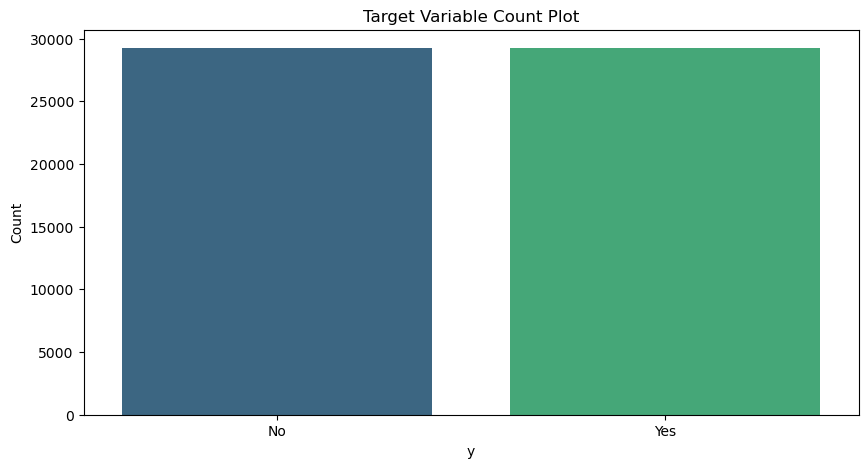

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_train_os,data=df,palette='viridis',hue = y_train_os,legend=False)
plt.xticks([1,0], ['Yes', 'No'])
plt.xlabel('y')
plt.ylabel('Count')
plt.title("Target Variable Count Plot")
plt.show()

## Modelling

In [32]:
table = pd.DataFrame(columns=['Model', 'Precision', 'Recall','F1 Score','Accuracy'])

#### Function to display confusion matrix and display various measures

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
def evaluate(y_pred,model_name,table,y_test=y_test):
    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred)
    recall= recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    new_row = pd.DataFrame({'Model': [model_name],
                            'Precision': [precision],
                            'Recall': [recall],
                            'F1 Score': [f1],
                            'Accuracy': [accuracy]})
    new_row = new_row.dropna(axis=1, how='all') # For removing warning.
    table = pd.concat([table, new_row], ignore_index=True)
    table = table.round(2)
    print(table)
    plt.figure(figsize=(9,9))
    ConfusionMatrixDisplay.from_predictions(label.inverse_transform(y_test),label.inverse_transform(y_pred),cmap='viridis')
    plt.show()
    return table
    


1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_os,y_train_os)

LogisticRegression()

In [35]:
y_pred = log_reg.predict(x_test_pre)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.82      0.56     85.41


/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_4470/1815859171.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table = pd.concat([table, new_row], ignore_index=True)


<Figure size 900x900 with 0 Axes>

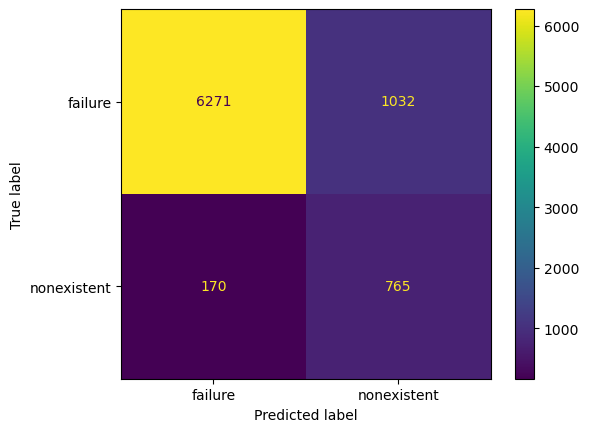

In [36]:
table = evaluate(y_pred,'Logistic Regression',table)

2. KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_os,y_train_os)

KNeighborsClassifier()

In [38]:
y_pred_knn = knn.predict(x_test_pre)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.82      0.56     85.41
1   KNearest Neighbour       0.39    0.77      0.52     83.62


<Figure size 900x900 with 0 Axes>

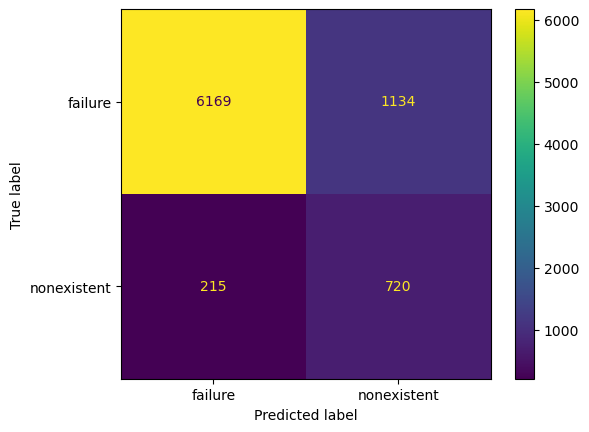

In [39]:
table = evaluate(y_pred_knn,'KNearest Neighbour',table)

3. SGD

In [40]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train_os,y_train_os)
y_pred_sgd=sgd.predict(x_test_pre)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.82      0.56     85.41
1   KNearest Neighbour       0.39    0.77      0.52     83.62
2                  SGD       0.44    0.80      0.57     86.05


<Figure size 900x900 with 0 Axes>

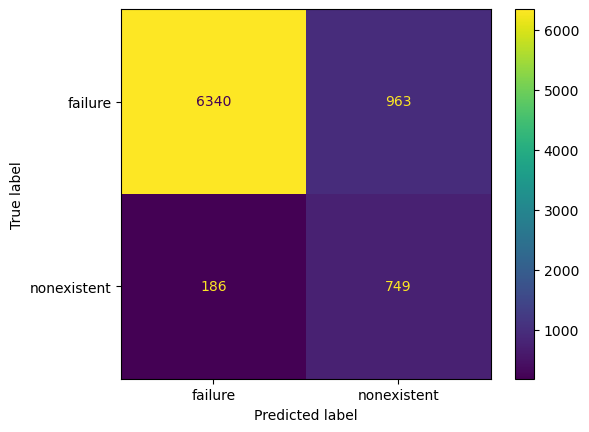

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.43,0.82,0.56,85.41
1,KNearest Neighbour,0.39,0.77,0.52,83.62
2,SGD,0.44,0.80,0.57,86.05


In [41]:
evaluate(y_pred_sgd,'SGD',table)

4. Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_os,y_train_os)
y_pred_dt=dt.predict(x_test_pre)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.82      0.56     85.41
1   KNearest Neighbour       0.39    0.77      0.52     83.62
2        Decision Tree       0.43    0.52      0.47     86.84


<Figure size 900x900 with 0 Axes>

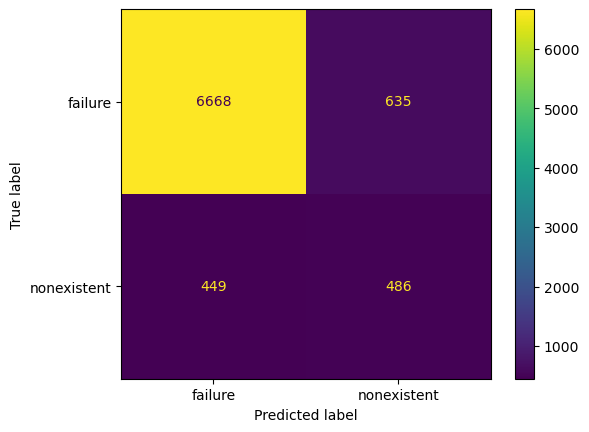

In [43]:
table = evaluate(y_pred_dt,'Decision Tree',table)

5. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_os,y_train_os)
y_pred_rf = rf.predict(x_test_pre)

In [45]:
x_train_os.shape

(58490, 57)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.82      0.56     85.41
1   KNearest Neighbour       0.39    0.77      0.52     83.62
2        Decision Tree       0.43    0.52      0.47     86.84
3        Random Forest       0.58    0.49      0.53     90.13


<Figure size 900x900 with 0 Axes>

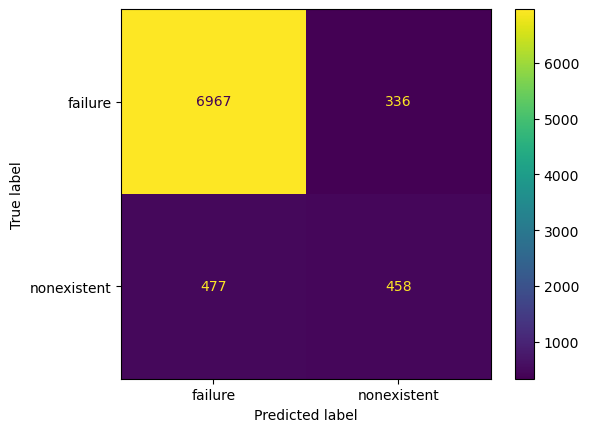

In [46]:
table = evaluate(y_pred_rf,"Random Forest",table)

#### Since Random Forest is having best accuracy so fine tuning it.

In [47]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50,100,150,200,300],            
    'max_depth': [5,10,15],                  
    'min_samples_split': [10,20, 50],          
    'min_samples_leaf': [5, 20,35,50],           
    'max_features': ['sqrt', 'log2'],          
    'bootstrap': [True,False],                        
    'criterion': ['gini', 'entropy'],          
    'class_weight': [None, 'balanced']         
}
rf2=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,n_iter=10,cv=3,scoring='accuracy',random_state=42,n_jobs=-1)
rf2.fit(x_train_os,y_train_os)
y_pred_rf2=rf2.predict(x_test_pre)

In [48]:
rf2.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 35,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'gini',
 'class_weight': None,
 'bootstrap': True}

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.82      0.56     85.41
1   KNearest Neighbour       0.39    0.77      0.52     83.62
2        Decision Tree       0.43    0.52      0.47     86.84
3        Random Forest       0.58    0.49      0.53     90.13
4  Random Forest(RSCV)       0.46    0.74      0.56     86.99


<Figure size 900x900 with 0 Axes>

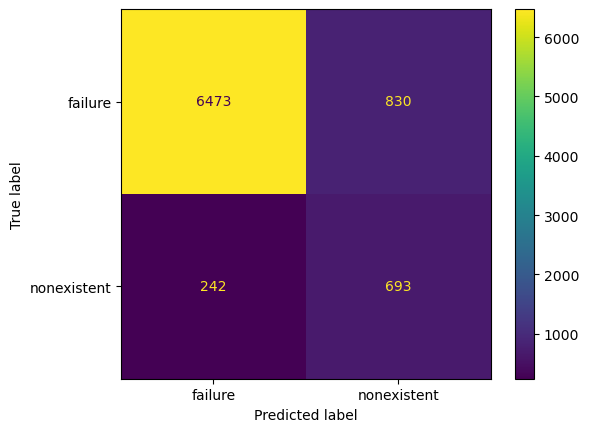

In [49]:
table = evaluate(y_pred_rf2,"Random Forest(RSCV)",table)

In [51]:
table

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.43,0.82,0.56,85.41
1,KNearest Neighbour,0.39,0.77,0.52,83.62
2,Decision Tree,0.43,0.52,0.47,86.84
3,Random Forest,0.58,0.49,0.53,90.13
4,Random Forest(RSCV),0.46,0.74,0.56,86.99


### Observation
1. Even After Fine Tuning `Random Forest(RSCV)` have slightly less Accuracy and Precision than 
`Random Forest`.
2. Using `Random Forest` as final model for prediction **because of highest Precision and Accuracy**.

Here, according to me, `Precision is more crucial than Accuracy` because the bank is interested in knowing out of all 'Yes' predictions, how many were actually 'Yes'. Hence, we want to reduce False Positives, and for this, we are focusing on Precision.

In [52]:
# import gzip
# with gzip.open('rf.pkl.gz', 'rb') as f:
#     pickle_model = pickle.load(f)
# pickle_pre = pickle.load(open('preprocessing.pkl','rb'))

In [55]:
with open("random_forest_model.pkl", "rb") as f:
    pickle_model = pickle.load(f)

In [56]:
pickle_model.n_features_in_

57

In [58]:
df.describe()

,age,duration,campaign,previous
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963
std,10.42125,259.279249,2.770014,0.494901
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000
max,98.00000,4918.000000,56.000000,7.000000
